In [33]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [34]:
df = pd.read_csv(r"C:\Users\kadah\Downloads\archive (14)\Twitter_Data.csv")

In [35]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [36]:
# geting top 5 rows 
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [37]:
# getting bottom 5 rows
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [38]:
# total shape of the data set
df.shape

(162980, 2)

In [39]:
# Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [40]:
# Getting mean, min , max, & std
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [41]:
# checking is there any null value present or not
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [42]:
# checking null values in percentage
(df.isnull().sum() / len(df)) * 100

clean_text    0.002454
category      0.004295
dtype: float64

<Axes: >

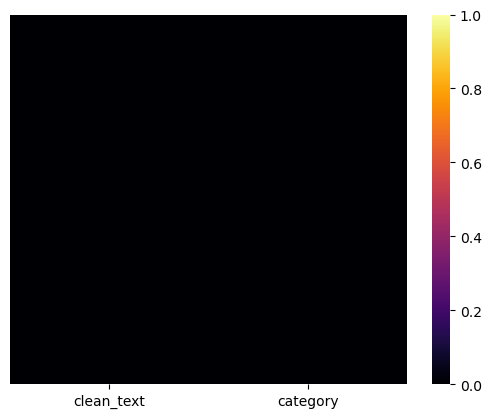

In [43]:
#Visualization of null values using the heatmap

sns.heatmap(df.isnull(),yticklabels=False,cmap="inferno")

In [44]:
df['category'].fillna(df['category'].mean(), inplace = True)
df['clean_text'].fillna(df['clean_text'].mode()[0], inplace = True)

In [45]:
# checking is there any null value present or not
df.isnull().sum()

clean_text    0
category      0
dtype: int64

<Axes: >

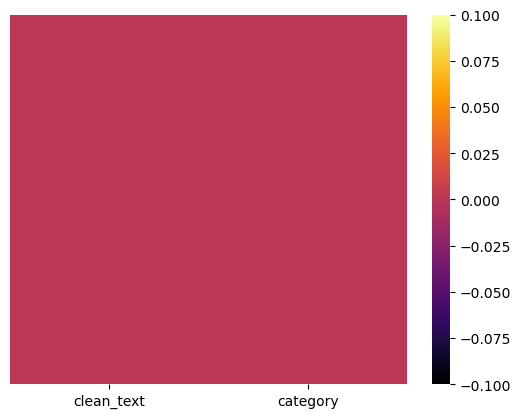

In [46]:
#Visualization of null values using the heatmap

sns.heatmap(df.isnull(),yticklabels=False,cmap="inferno")

In [47]:
# analyzing text emotional tone

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
df['Sentiment'] = df['clean_text'].astype(str).apply(get_sentiment)
print(df.head())

                                          clean_text  category Sentiment
0  when modi promised “minimum government maximum...      -1.0  negative
1  talk all the nonsense and continue all the dra...       0.0   neutral
2  what did just say vote for modi  welcome bjp t...       1.0  positive
3  asking his supporters prefix chowkidar their n...       1.0  positive
4  answer who among these the most powerful world...       1.0  positive


In [48]:
# applying LSTM model
X = df['clean_text']
y = df['category']

In [49]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = utils.to_categorical(y)

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [51]:
vocab_size = len(tokenizer.word_index) + 1

In [52]:
max_seq_length = max([len(seq) for seq in sequences])

In [53]:
X_pad = pad_sequences(sequences, maxlen=max_seq_length)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [55]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_seq_length,)))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 52, 100)           11368000  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11485635 (43.81 MB)
Trainable params: 11485635 (43.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


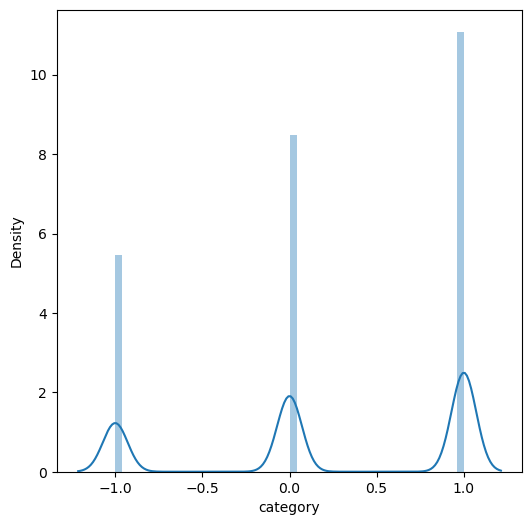

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(df['category'])
plt.show()

<Axes: xlabel='category', ylabel='Density'>

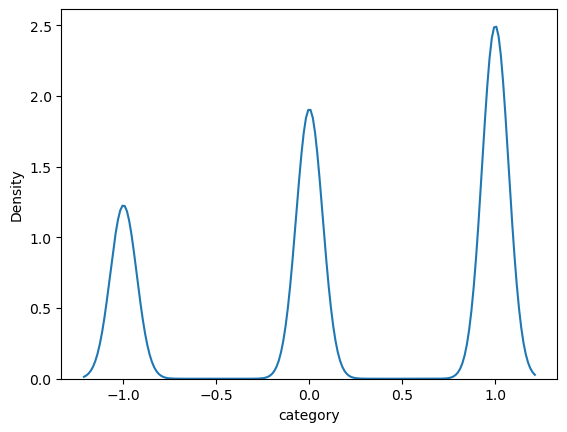

In [59]:
sns.kdeplot(x='category', data=df)